In [36]:
import yt
import numpy as np
import bokeh
import bokeh.plotting as blt
bokeh.io.output_notebook()

Loading BokehJS ...

In [2]:
ytData=yt.load('/Users/Zephyr/Desktop/Elis_Enzo_Sim/data0010')
ad=ytData.all_data()
masses = ad['particle_mass'][:].in_units('Msun').v
x_pos  = ad['particle_position_x'][:].in_units('kpc').v
y_pos  = ad['particle_position_y'][:].in_units('kpc').v
z_pos  = ad['particle_position_z'][:].in_units('kpc').v
x_vel  = ad['particle_velocity_x'][:].in_units('kpc/Gyr').v
y_vel  = ad['particle_velocity_y'][:].in_units('kpc/Gyr').v
z_vel  = ad['particle_velocity_z'][:].in_units('kpc/Gyr').v

yt : [INFO     ] 2017-03-24 13:41:34,029 Parameters: current_time              = 94.734041784862
yt : [INFO     ] 2017-03-24 13:41:34,030 Parameters: domain_dimensions         = [128 128 128]
yt : [INFO     ] 2017-03-24 13:41:34,032 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2017-03-24 13:41:34,034 Parameters: domain_right_edge         = [ 1.  1.  1.]
yt : [INFO     ] 2017-03-24 13:41:34,036 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2017-03-24 13:41:34,038 Parameters: current_redshift          = 7.4462548121674
yt : [INFO     ] 2017-03-24 13:41:34,039 Parameters: omega_lambda              = 0.68
yt : [INFO     ] 2017-03-24 13:41:34,040 Parameters: omega_matter              = 0.32
yt : [INFO     ] 2017-03-24 13:41:34,042 Parameters: hubble_constant           = 0.67
Parsing Hierarchy : 100%|██████████| 1856/1856 [00:00<00:00, 13019.80it/s]
yt : [INFO     ] 2017-03-24 13:41:34,297 Gathering a field list (this may take a moment.)
/Users/Zephyr/A

In [31]:
x_c=np.sum(masses*x_pos)/np.sum(masses)
y_c=np.sum(masses*y_pos)/np.sum(masses)
z_c=np.sum(masses*z_pos)/np.sum(masses)
pos=np.array([x_pos-x_c,y_pos-y_c,z_pos-z_c])
print('center of mass: ',x_c,y_c,z_c)
x_u=np.sum(masses*x_vel)/np.sum(masses)
y_u=np.sum(masses*y_vel)/np.sum(masses)
z_u=np.sum(masses*z_vel)/np.sum(masses)
vel=np.array([x_vel-x_u,y_vel-y_u,z_vel-z_u])
print('center of mass: ',x_u,y_u,z_u)
m=np.array(masses)
rad=np.linalg.norm(pos,axis=0)

center of mass:  167.935389897 185.102826472 185.333087003
center of mass:  -0.00605945721115 0.00967773889773 -0.00113354260402


In [25]:
nParticle=rad.size
vr=np.zeros(nParticle)
vt=np.zeros(nParticle)
for i in range(nParticle):
    vr[i]=np.dot(pos[:,i],vel[:,i])/rad[i]
    vt[i]=np.sqrt(np.linalg.norm(vel[:,i])**2-vr[i]**2)

In [56]:
rMin=1
rMax=10
nBin=4
edges=np.logspace(np.log(rMin),np.log(rMax),nBin+1)
rho=np.zeros(nBin)
vRad=np.zeros(nBin)
sRad=np.zeros(nBin)
vTan=np.zeros(nBin)
sTan=np.zeros(nBin)
for i in range(nBin):
    inBin=np.argwhere((rad>edges[i]) & (rad<edges[i+1]))
    #print(inBin)
    rho[i]=np.sum(m[inBin])/((4/3)*np.pi*(edges[i+1]**3 - edges[i]**3))

In [57]:
fig=blt.figure(x_axis_type='log',y_axis_type='log')
fig.line(edges,rho)
blt.show(fig)

/Users/Zephyr/Astro/anaconda/lib/python3.5/site-packages/bokeh/models/sources.py:81: BokehUserWarning: ColumnDataSource's columns must be of the same length
  lambda: warnings.warn("ColumnDataSource's columns must be of the same length", BokehUserWarning))


yt : [INFO     ] 2017-03-26 20:12:36,293 Projection completed
yt : [INFO     ] 2017-03-26 20:12:36,294 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-03-26 20:12:36,295 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-03-26 20:12:36,298 xlim = 0.000000 1.000000
yt : [INFO     ] 2017-03-26 20:12:36,299 ylim = 0.000000 1.000000
yt : [INFO     ] 2017-03-26 20:12:36,301 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800
yt : [INFO     ] 2017-03-26 20:12:36,525 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



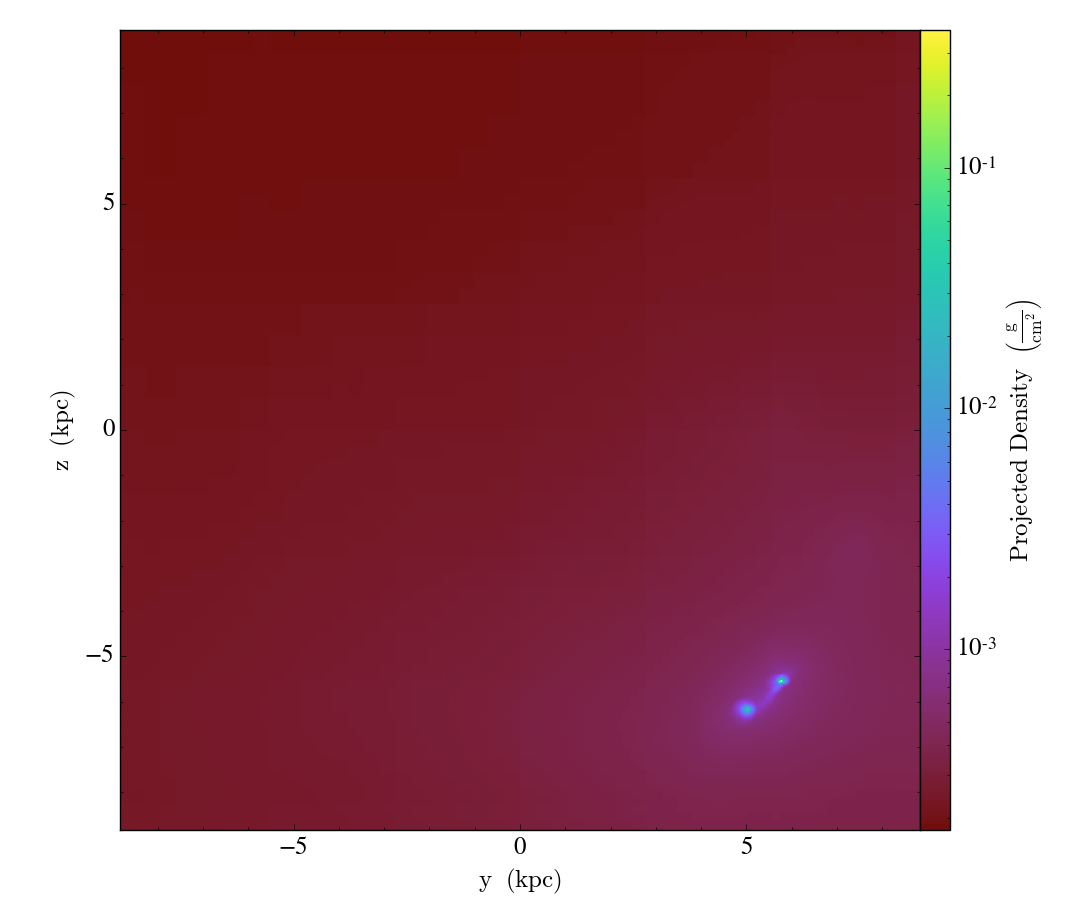

In [71]:
ytPlot=yt.ProjectionPlot(ytData, "x", "density")
ytPlot.zoom(20)

In [80]:
# no fucking clue
sphere = ytData.sphere("max", (100., "kpc"))
plot = yt.ProfilePlot(sphere, "radius", ["velocity_x"])
plot.show()

yt : [INFO     ] 2017-03-26 20:18:37,347 Max Value is 3.70890e-14 at 0.4607892781496060 0.5162598639726660 0.4843152016401284
/Users/Zephyr/Astro/yt/yt/data_objects/grid_patch.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  startIndex[2]:endIndex[2]] = tofill
